## Deep Learning with PyTorch : Neural Style Transfer

In [ ]:
!pip install torch torchvision

## Task 2 : Loading VGG Pretrained Model

Importing necessary dependencies and packages.

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 85.3MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for parameters in vgg.parameters():

  parameters.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/quadeer15sh/celeba-face-recognition-triplets/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunaldivekar2525
Your Kaggle Key: ··········


100%|██████████| 231M/231M [00:01<00:00, 229MB/s]


In [ ]:
import os

DATA_DIR = '/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets'
print(os.listdir(DATA_DIR))

['triplets.csv', 'images']


In [ ]:
from PIL import Image


from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
def preprocess(img_path, max_size = 64):

  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size

  else:
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),  # (224, 224, 3) -> (3, 224, 224)
      T.Normalize(mean = [0.485, 0.456, 0.406],
                  std = [0.229, 0.224, 0.225])
  ])

  image = img_transforms(image)

  image = image.unsqueeze(0) # (3, 224, 224) -> (1, 3, 224, 224)

  return image

In [ ]:
content_p = preprocess('/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets/images/000023.jpg')
style_p = preprocess('/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets/images/000045.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content shape", content_p.shape)
print("Style shape", style_p.shape)

Content shape torch.Size([1, 3, 86, 64])
Style shape torch.Size([1, 3, 91, 64])


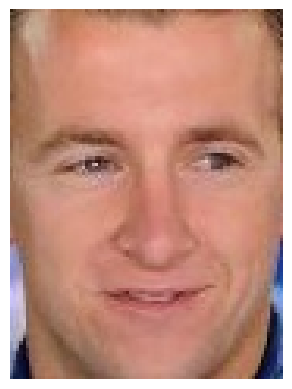

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets/images/000023.jpg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis
plt.show()

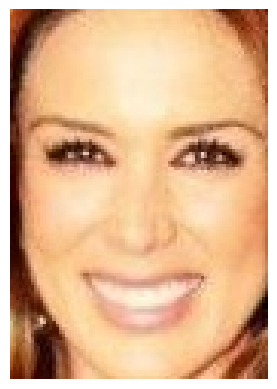

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets/images/000045.jpg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis
plt.show()

## Task 4 : Deprocess image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):

  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1, 2, 0)

  # denormalizing the image
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])

  image = image.clip(0, 1)

  return image

In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocess content:", content_d.shape)
print("Deprocess style:", style_d.shape)

Deprocess content: (86, 64, 3)
Deprocess style: (91, 64, 3)


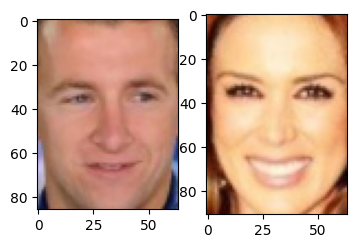

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 4))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
def get_features(image, model):

  layers = {

            '0' : 'conv1_1',
            '5' : 'conv2_1',
            '10' : 'conv3_1',
            '19' : 'conv4_1',
            '21' : 'conv4_2',
            '28' : 'conv5_1'
  }

  x = image

  Features = {}

  for name, layer in model._modules.items():

    x = layer(x)

    if name in layers:
      Features[layers[name]] = x

  return Features

In [ ]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

In [ ]:
print(style_f)

{'conv1_1': tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[4.1626e-01, 1.2703e+00, 6.0621e-01,  ..., 4.7750e-01,
           9.5981e-02, 0.0000e+00],
          [4.1937e-01, 1.7505e+00, 1.4745e+00,  ..., 1.5199e+00,
           6.6095e-01, 0.0000e+00],
          [7.6089e-01, 1.5643e+00, 1.5498e+00,  ..., 1.4274e+00,
           7.1065e-01, 0.0000e+00],
          ...,
          [1.8043e+00, 6.8279e-01, 0.0000e+00, 

In [ ]:
def gram_matrix(tensor):

  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w)

  gram = torch.mm(tensor, tensor.t())

  return gram

In [ ]:
style_grams = { layer : gram_matrix(style_f[layer]) for layer in style_f }

## Task 6 : Creating Style and Content loss function

In [ ]:
def content_loss(target_conv4_2, content_conv4_2):

  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {

                 'conv1_1' : 1.0,
                 'conv2_1' : 0.75,
                 'conv3_1' : 0.2,
                 'conv4_1' : 0.2,
                 'conv5_1' : 0.2
}

In [ ]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss

In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print("Content Loss: ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Style Loss: ", style_loss(style_weights, target_f, style_grams))

Content Loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(7.7152, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
from torch import optim

optimizer = optim.Adam([target], lr = 0.003) # Since, we have to optimize the pixel values of target image.

# Declaring hyperparameters using in the training loop.
alpha = 1 # Content reconstruction weight
beta = 1e5

epochs = 10000
show_every = 500

In [ ]:
def total_loss(c_loss, s_loss, alpha, beta):

 #loss = alpha * content_loss + beta * style_loss
 loss = alpha * c_loss + beta * s_loss
 return loss

In [ ]:
results = []
# Creating the training loop.
for i in range(epochs):
  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)

  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()

  # Finding the gradients
  t_loss.backward()

  #Update the pixel values of target image after getting the gradients.
  optimizer.step()

  # Showing the result at every 500th step.
  if i % show_every == 0:
    print("Total loss at epoch {}: {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

Total loss at epoch 0: 17426.16796875
Total loss at epoch 500: 13345.3994140625
Total loss at epoch 1000: 11558.4365234375
Total loss at epoch 1500: 10868.8818359375
Total loss at epoch 2000: 10414.5634765625
Total loss at epoch 2500: 10132.6103515625
Total loss at epoch 3000: 9993.9423828125
Total loss at epoch 3500: 9891.794921875
Total loss at epoch 4000: 9810.337890625
Total loss at epoch 4500: 9722.90234375
Total loss at epoch 5000: 9653.525390625
Total loss at epoch 5500: 9570.283203125
Total loss at epoch 6000: 9483.279296875
Total loss at epoch 6500: 9409.1708984375
Total loss at epoch 7000: 9366.4765625
Total loss at epoch 7500: 9312.931640625
Total loss at epoch 8000: 9280.1845703125
Total loss at epoch 8500: 9241.7568359375
Total loss at epoch 9000: 9212.181640625
Total loss at epoch 9500: 9160.412109375


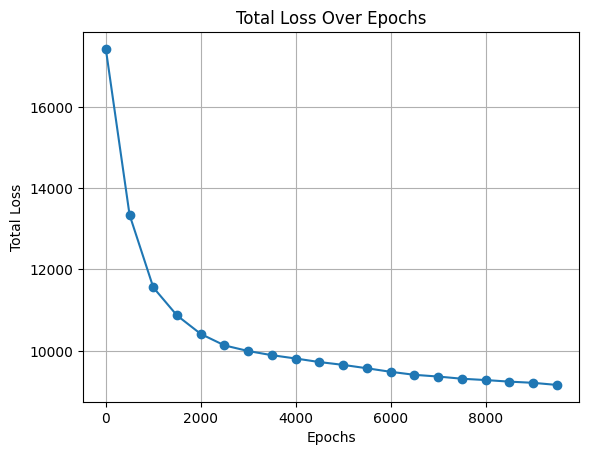

In [ ]:
import matplotlib.pyplot as plt

# Total loss values at different epochs
epoch_loss = {
    0: 17426.16796875,
    500: 13345.3994140625,
    1000: 11558.4365234375,
    1500: 10868.8818359375,
    2000: 10414.5634765625,
    2500: 10132.6103515625,
    3000: 9993.9423828125,
    3500: 9891.794921875,
    4000: 9810.337890625,
    4500: 9722.90234375,
    5000: 9653.525390625,
    5500: 9570.283203125,
    6000: 9483.279296875,
    6500: 9409.1708984375,
    7000: 9366.4765625,
    7500: 9312.931640625,
    8000: 9280.1845703125,
    8500: 9241.7568359375,
    9000: 9212.181640625,
    9500: 9160.412109375
}

# Extracting epochs and loss values
epochs = list(epoch_loss.keys())
loss_values = list(epoch_loss.values())

# Plotting total loss over epochs
plt.plot(epochs, loss_values, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Total Loss Over Epochs')
plt.grid(True)
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

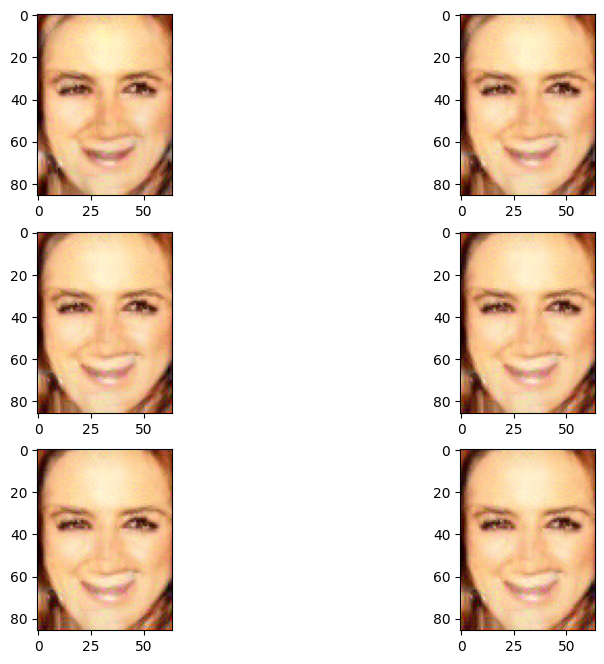

In [ ]:
plt.figure(figsize = (10, 8))

for i in range(len(results)):
  plt.subplot(3, 2, i+1)
  plt.imshow(results[i])

plt.show()

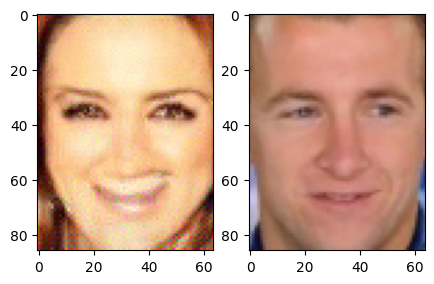

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5, 5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)